In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [2]:
# I use the data directly from https://databank.worldbank.org/reports.aspx?Code=SP.DYN.LE00.IN&id=1ff4a498&report_name=Popular-Indicators&populartype=series&ispopular=y
# instead of the data in the dropbox because I think there are some de-coding issue 
# when I use pandas to read dataset in dropbox
# I did some extra processing to get data we need.
df = pd.read_csv("./270data.csv", header=0)
df = df.replace("..", np.nan)
df.columns = ["Series Name", "Series Code", "Country", "Country Code", 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
df.iloc[:, 4:] = df.iloc[:, 4:].astype(float)

df = df.melt(id_vars=["Series Name", "Series Code", "Country", "Country Code"], 
        var_name="years", 
        value_name="value")

# get life expectancy data
life_expectancy = df[df["Series Name"] == "Life expectancy at birth, total (years)"]

# get child Mortality data
CM = df[df["Series Name"] == "Mortality rate, under-5 (per 1,000 live births)"]

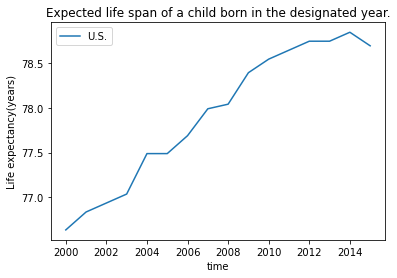

In [3]:
# Creat netural view of the data about life span
us_life = life_expectancy[life_expectancy["Country"].isin(["United States"])].copy()
sns.lineplot(data=us_life, x="years", y="value", label="U.S.")
plt.xlabel("time")
plt.ylabel("Life expectancy(years)")
plt.title("Expected life span of a child born in the designated year.")
plt.savefig("neutral_life")

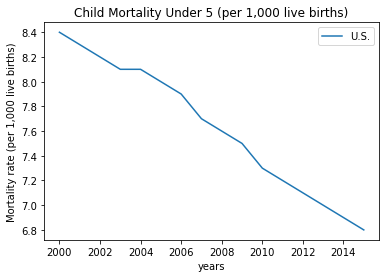

In [4]:
# Creat netural view of the data about Child Mortality
cm_us = CM[CM["Country"].isin(["United States"])].copy()
sns.lineplot(data=cm_us, x="years", y="value", label="U.S.")
plt.title("Child Mortality Under 5 (per 1,000 live births)")
plt.ylabel("Mortality rate (per 1,000 live births)")
plt.savefig("neutral_cm")

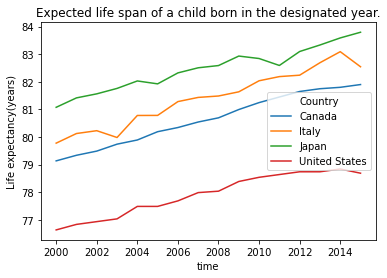

In [5]:
# shows how bad the us health care system is by compare to other country in life span.
more_life = life_expectancy[life_expectancy["Country"].isin(["United States", "Japan", "Canada", "Italy"])]
sns.lineplot(data=more_life, x="years", y="value", hue="Country")

plt.xlabel("time")
plt.ylabel("Life expectancy(years)")
plt.title("Expected life span of a child born in the designated year.")
plt.savefig("us_bad_life")

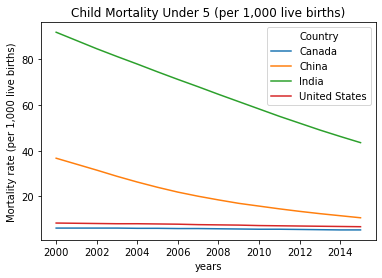

In [6]:
# shows how good the us health care system is by compare to other country in child death.
more_cm = CM[CM["Country"].isin(["United States", "Canada", "India", "China"])]
sns.lineplot(data=more_cm, x="years", y="value", hue="Country")
plt.title("Child Mortality Under 5 (per 1,000 live births)")
plt.ylabel("Mortality rate (per 1,000 live births)")
plt.xlabel("years")
plt.savefig("good_cm")

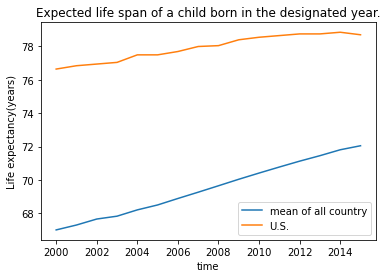

In [7]:
# shows how good the us health care system is by compare to other country in life span.

life_mean = life_expectancy.groupby("years").value.mean()
plt.plot(life_mean, label="mean of all country")
sns.lineplot(data=us_life, x="years", y="value", label="U.S.")
plt.xlabel("time")
plt.ylabel("Life expectancy(years)")
plt.title("Expected life span of a child born in the designated year.")
plt.savefig("good_life")

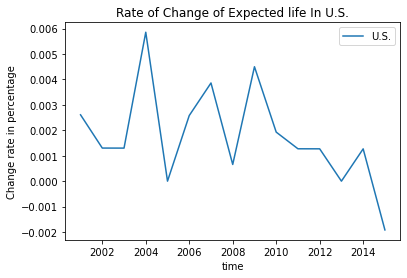

In [8]:
# shows the increase rate for expected life.
us_life["diff"] = us_life["value"].pct_change()
sns.lineplot(data=us_life, x="years", y="diff", label="U.S.")
plt.title("Rate of Change of Expected life In U.S.")
plt.xlabel("time")
plt.ylabel("Change rate in percentage")
plt.savefig("bad_life2", bbox_inches="tight")

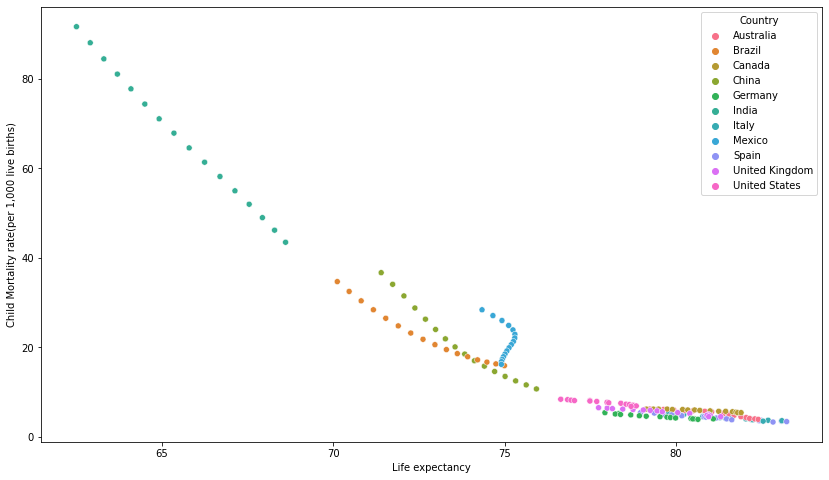

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
a = CM[["Series Name", "Country", "years", "value"]]
b = pd.merge(a, life_expectancy, on=['Country','years'])
b = b[b["Country"].isin(["United States", "Canada", "United Kingdom", "Australia", "Spain", "Italy", "Germany", "Brazil", "China", " Japan", "Mexico"])]
sns.scatterplot(data=b, x="value_y", y="value_x", hue="Country", ax=ax)
plt.ylabel("Child Mortality rate(per 1,000 live births)")
plt.xlabel("Life expectancy")
plt.savefig("nat2", bbox_inches="tight")

In [46]:
# compare the less avg life expectancy
v = life_expectancy.groupby("Country",as_index=False).value.mean()
v.sort_values("value", ascending=False).dropna().tail(40)

,Country,value
74,Ghana,59.845813
0,Afghanistan,59.649000
84,Haiti,59.643687
54,Djibouti,59.491937
162,Rwanda,58.955312
64,Ethiopia,58.780563
71,"Gambia, The",58.674500
20,Benin,58.205750
101,Kenya,57.769625
45,"Congo, Rep.",57.732375


In [26]:
# check where U.S. at
v[v.Country == "United States"]

,Country,value
206,United States,77.920274


In [38]:
# compare the top child mortality
c = CM.groupby("Country",as_index=False).value.mean()
c.sort_values("value", ascending=False).dropna().head(10)

,Country,value
170,Sierra Leone,178.72500
176,Somalia,161.26875
38,Chad,156.94375
37,Central African Republic,150.68125
143,Niger,150.40000
144,Nigeria,148.25000
122,Mali,144.73750
5,Angola,144.16250
30,Burkina Faso,138.26875
82,Guinea-Bissau,130.56875


In [49]:
# check where is U.S. at
c[c.Country == "United States"]

,Country,value
206,United States,7.63125


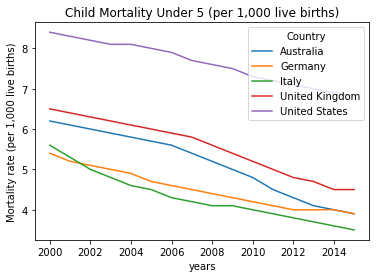

In [41]:
# compare child Mortality in different country, 
# intend to pick small Mortality country to make U.S. looks bad
cm_us = CM[CM["Country"].isin(["United States", "Germany", "Italy", "Australia", "United Kingdom"])].copy()
sns.lineplot(data=cm_us, x="years", y="value", hue="Country")
plt.title("Child Mortality Under 5 (per 1,000 live births)")
plt.ylabel("Mortality rate (per 1,000 live births)")
plt.savefig("bac_cm")

Text(0.5, 1.0, 'Expected life span of a child born in the designated year.')

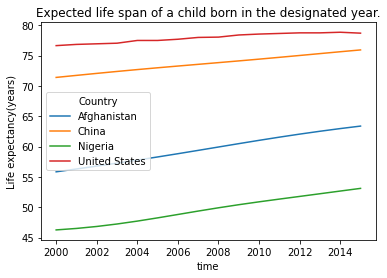

In [47]:
# compare expected life span in different country, 
# intend to pick low life span country to make U.S. looks good
more_life = life_expectancy[life_expectancy["Country"].isin(["United States", "China", "Afghanistan", "Nigeria"])]
sns.lineplot(data=more_life, x="years", y="value", hue="Country")

plt.xlabel("time")
plt.ylabel("Life expectancy(years)")
plt.title("Expected life span of a child born in the designated year.")